In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("spam.csv")

In [4]:
df.sample(5)

,Category,Message
300,ham,Need a coffee run tomo?Can't believe it's that...
3198,ham,So its to be poking man everyday that they tea...
3594,ham,"Sorry, I'll call later"
3063,ham,Fine. Do you remember me.
3010,spam,Update_Now - 12Mths Half Price Orange line ren...


In [5]:
df.shape

(5572, 2)

## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Dataset is already cleaned. There are no null values

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['Category'] = encoder.fit_transform(df['Category'])

We have encoded "ham" as 0 and "spam" as 1

In [9]:
df.duplicated().sum()

415

Removing duplicate values

In [10]:
df = df.drop_duplicates(keep="first")

In [11]:
df.shape

(5157, 2)

# EDA 

In [12]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

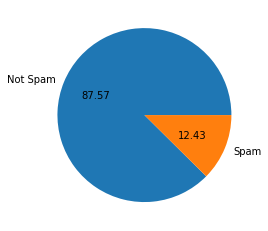

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=["Not Spam","Spam"],autopct = "%0.2f")
plt.show()

Data has imbalance. 88% isn't spam. Only 12% of the data represents spam messages

In [15]:
import nltk

In [16]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shalu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df["num_characters"] =  df["Message"].apply(len)

In [18]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
df["Message"].apply(lambda x: nltk.word_tokenize(x))   #splits into words using " " as delimeter

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5157, dtype: object

In [20]:
df["num_words"] = df["Message"].apply(lambda x: len(nltk.word_tokenize(x)))  

In [21]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
df["num_sentences"] = df["Message"].apply(lambda x: len(nltk.sent_tokenize(x)))  

In [23]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


We are trying to generate features upon which our model can be built. 

In [24]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560016,1.965290
std,58.382922,13.403671,1.439549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


This is for the complete dataset. Lets see how it differs for "Not Spam" messages

In [25]:
df[df["Category"] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267272,1.822852
std,56.708301,13.585433,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df["Category"] == 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.968799
std,30.399707,7.103501,1.486069
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


Spam messages seem to have higher mean and lesser max values as compared to Non-Spam messages.

In [27]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

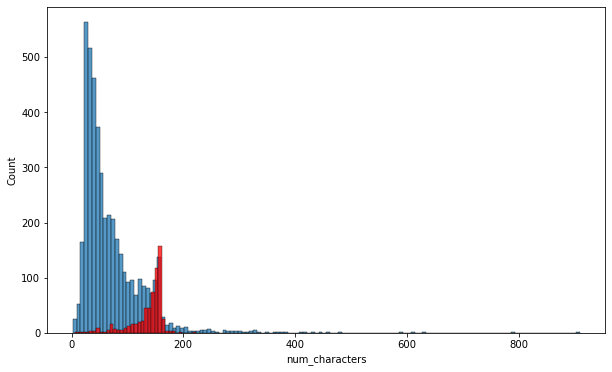

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df[df["Category"]==0]["num_characters"])
sns.histplot(df[df["Category"]==1]["num_characters"],color="red")

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

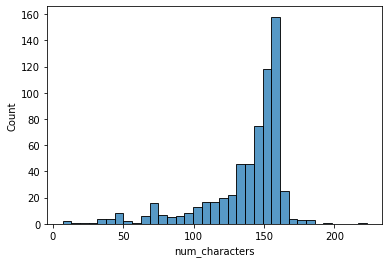

In [29]:
sns.histplot(df[df["Category"]==1]["num_characters"])

Clearly, spam messages have a higher count of messages having large num of characters.
Let's see if it is true in case of words and sentences as well.

<AxesSubplot:xlabel='num_words', ylabel='Count'>

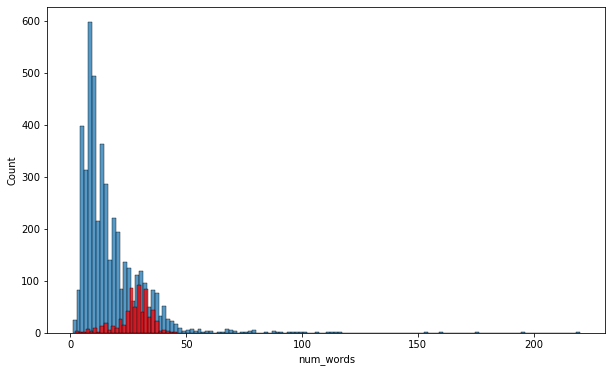

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df[df["Category"]==0]["num_words"])
sns.histplot(df[df["Category"]==1]["num_words"],color="red")

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

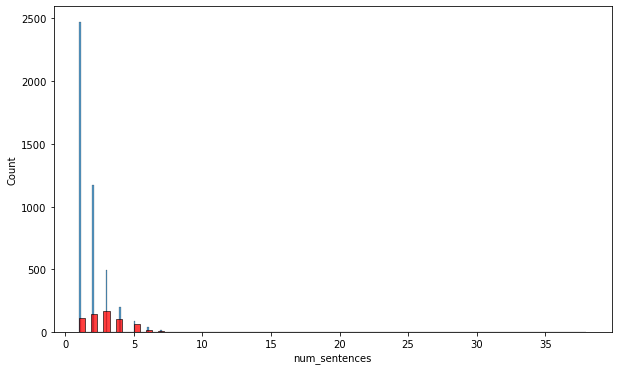

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df[df["Category"]==0]["num_sentences"])
sns.histplot(df[df["Category"]==1]["num_sentences"],color="red")

There is a similar distribution among these. Lets see the correlation between Category and other columns

In [32]:
df.corr()

,Category,num_characters,num_words,num_sentences
Category,1.000000,0.374409,0.256023,0.262657
num_characters,0.374409,1.000000,0.966179,0.624267
num_words,0.256023,0.966179,1.000000,0.680217
num_sentences,0.262657,0.624267,0.680217,1.000000


<AxesSubplot:>

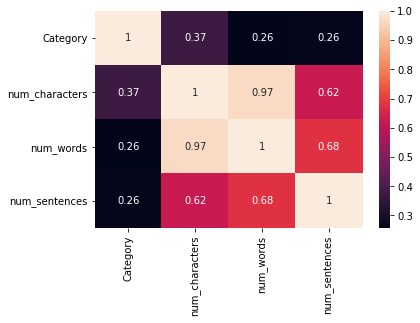

In [33]:
sns.heatmap(df.corr(),annot=True)

Spam and num characters have the highest correlation of 0.37. Number of words and sentences have similar correlation with being classified as Spam. There is expected to be a direct relation between number of characters and number of words and number of characters and number of sentences.

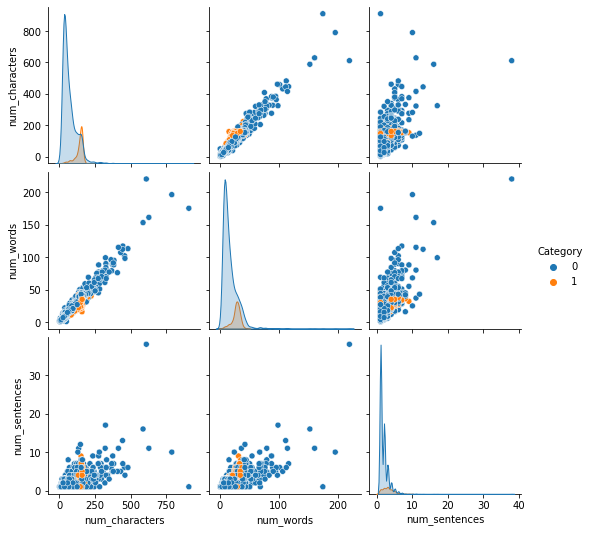

In [34]:
sns.pairplot(df,hue="Category")

Plots are roughly linear with some outliers. 
Since, there is a string correlation between num_characters,num_words,num_sentences, consider only num_characters

In [35]:
df["contains_URL"] = df["Message"].str.match(r"https?://(\d+\.){3}\d+/")  

In [36]:
df["contains_URL"].value_counts()

False    5157
Name: contains_URL, dtype: int64

In [37]:
import re

In [38]:
def strip_character(dataCol):
    r = re.compile(r'[^a-zA-Z !@#$%&*_+-=|\:";<>,./()[\]{}\']')
    return r.sub('', dataCol)

df["special_characters"] = df["Message"].apply(strip_character)

In [39]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,contains_URL,special_characters
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,False,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,False,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,False,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,False,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,False,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
df["only_alphabets"]= df["Message"].str.isalpha()

In [41]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,contains_URL,special_characters,only_alphabets
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,False,"Go until jurong point, crazy.. Available only ...",False
1,0,Ok lar... Joking wif u oni...,29,8,2,False,Ok lar... Joking wif u oni...,False
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,False,Free entry in 2 a wkly comp to win FA Cup fina...,False
3,0,U dun say so early hor... U c already then say...,49,13,1,False,U dun say so early hor... U c already then say...,False
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,False,"Nah I don't think he goes to usf, he lives aro...",False


In [42]:
df["only_alphabets"].value_counts()

False    5153
True        4
Name: only_alphabets, dtype: int64

We cannot make assertions based on these results. We delete these columns

In [43]:
df = df.drop(["contains_URL","special_characters","only_alphabets"],axis=1)

In [44]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


Spam messages might contain URLs. In this data, there are no messages containing URLs

We'll further do some standard preprocessing of data for NLP projects as mentioned here https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

# Data PreProcessing

Removing Punctuations

In [45]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
string.punctuation
nltk.download('stopwords')
stopwords.words("english")
ps=PorterStemmer()
ps.stem("singing")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shalu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'sing'

In [46]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [47]:
#transform_text("Good Day %  Shuvam are you okay Dancing Singing ?")

In [48]:
df["clean_msg"] = df["Message"].apply(transform_text)

In [50]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,clean_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Next, we want to see the most frequently used words in both spam and nonspam. For this we use Word Cloud as discussed here : https://www.analyticsvidhya.com/blog/2020/10/word-cloud-or-tag-cloud-in-python/

In [51]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [52]:
spam_wc = wc.generate(df[df["Category"]==1]["clean_msg"].str.cat(sep=" "))

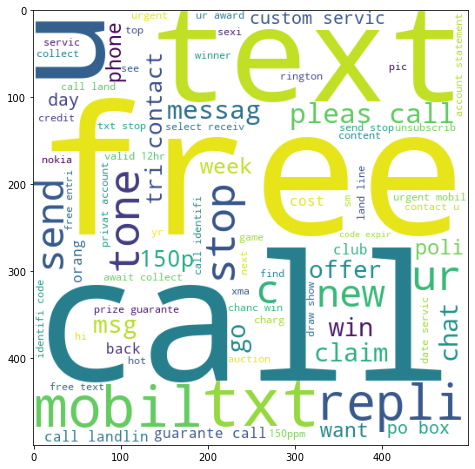

In [53]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

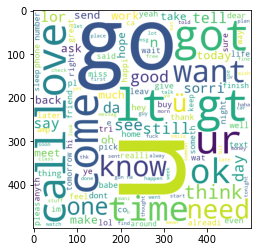

In [54]:
non_spam_wc = wc.generate(df[df["Category"]==0]["clean_msg"].str.cat(sep=" "))
plt.imshow(non_spam_wc)

We now extract the top 30 words used in spam and non-spam messages

In [55]:
spam_corpus=[]
for msg in df[df["Category"]==1]["clean_msg"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

9781

There are 9781 words used in spam messages. To take top 30 frequent words, we have to calculate frequency of each word

In [57]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 311),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 115),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 96),
 ('4', 95),
 ('prize', 78),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 56),
 ('award', 55),
 ('nokia', 54),
 ('contact', 53),
 ('phone', 52),
 ('cash', 50),
 ('pleas', 50),
 ('week', 48),
 ('win', 46),
 ('min', 45),
 ('c', 43),
 ('guarante', 42)]

C:\Users\shalu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'ur'),
  Text(6, 0, 'u'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'send'),
  Text(17, 0, 'tone'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'award'),
  Text(20, 0, 'nokia'),
  Text(21, 0, 'contact'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'min'),
  Text(28, 0, 'c'),
  Text(29, 0, 'guarante')])

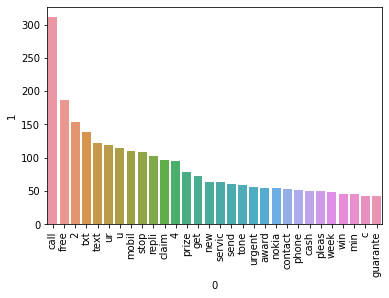

In [58]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")

In [59]:
non_spam_corpus=[]
for msg in df[df["Category"]==0]["clean_msg"].tolist():
    for word in msg.split():
        non_spam_corpus.append(word)

In [60]:
len(non_spam_corpus)

35938

In [61]:
Counter(non_spam_corpus).most_common(30)

[('u', 897),
 ('go', 407),
 ('get', 351),
 ('2', 288),
 ('gt', 288),
 ('lt', 287),
 ('come', 278),
 ('got', 239),
 ('know', 237),
 ('like', 236),
 ('call', 235),
 ('love', 222),
 ('time', 220),
 ('ok', 216),
 ('good', 215),
 ('want', 209),
 ('ur', 203),
 ('day', 195),
 ('ü', 173),
 ('need', 171),
 ('one', 166),
 ('4', 162),
 ('lor', 159),
 ('home', 152),
 ('think', 150),
 ('see', 148),
 ('take', 144),
 ('still', 144),
 ('da', 142),
 ('tell', 133)]

C:\Users\shalu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, '2'),
  Text(4, 0, 'gt'),
  Text(5, 0, 'lt'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'love'),
  Text(12, 0, 'time'),
  Text(13, 0, 'ok'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'ü'),
  Text(19, 0, 'need'),
  Text(20, 0, 'one'),
  Text(21, 0, '4'),
  Text(22, 0, 'lor'),
  Text(23, 0, 'home'),
  Text(24, 0, 'think'),
  Text(25, 0, 'see'),
  Text(26, 0, 'take'),
  Text(27, 0, 'still'),
  Text(28, 0, 'da'),
  Text(29, 0, 'tell')])

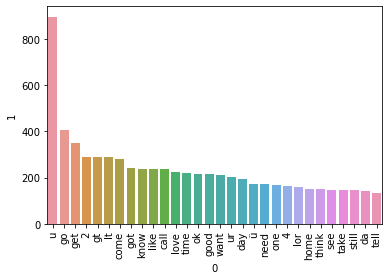

In [62]:
sns.barplot(pd.DataFrame(Counter(non_spam_corpus).most_common(30))[0],pd.DataFrame(Counter(non_spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")

# Creating Model 

In [63]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

We create words into vectors. First we use Bag of Words i.e. CountVectorizer

In [64]:
X_cv = cv.fit_transform(df["clean_msg"]).toarray()

In [65]:
X_cv.shape

(5157, 6781)

In [66]:
y = df["Category"].values

In [67]:
y.shape

(5157,)

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size=0.2,stratify=y,random_state=1)

Generally, for NLP Projects Naive Bayes is preferred. So, we'll use the same

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)

MemoryError: Unable to allocate 213. MiB for an array with shape (4125, 6781) and data type float64

In [76]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)

In [75]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)

MemoryError: Unable to allocate 213. MiB for an array with shape (4125, 6781) and data type int64

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [226]:
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8672480620155039
[[774 130]
 [  7 121]]
0.4820717131474104


In [79]:
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9806201550387597
[[888  16]
 [  4 124]]
0.8857142857142857


In [228]:
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9757751937984496
[[899   5]
 [ 20 108]]
0.9557522123893806


Now we use tfidf

In [80]:
X_tfidf = tfidf.fit_transform(df["clean_msg"]).toarray()

MemoryError: Unable to allocate 267. MiB for an array with shape (5157, 6781) and data type float64

In [81]:
X_tfidf.shape

NameError: name 'X_tfidf' is not defined

In [231]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_tfidf,y,test_size=0.2,stratify=y,random_state=1)

In [238]:
gnb.fit(X_train1,y_train1)
y_pred_gnb1 = gnb.predict(X_test1)

In [239]:
mnb.fit(X_train1,y_train1)
y_pred_mnb1 = mnb.predict(X_test1)

In [240]:
bnb.fit(X_train1,y_train1)
y_pred_bnb1 = bnb.predict(X_test1)

In [241]:
print(accuracy_score(y_test1,y_pred_gnb1))
print(confusion_matrix(y_test1,y_pred_gnb1))
print(precision_score(y_test1,y_pred_gnb1))

0.8624031007751938
[[774 130]
 [ 12 116]]
0.4715447154471545


In [242]:
print(accuracy_score(y_test1,y_pred_mnb1))
print(confusion_matrix(y_test1,y_pred_mnb1))
print(precision_score(y_test1,y_pred_mnb1))

0.9728682170542635
[[904   0]
 [ 28 100]]
1.0


Mnb using tfidf gives a precision score of 1. All spam messages are correctly classified.

In [250]:
tfidf1 = TfidfVectorizer(max_features=3000)

In [244]:
X_tfidf1 = tfidf1.fit_transform(df["clean_msg"]).toarray()

In [245]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_tfidf1,y,test_size=0.2,stratify=y,random_state=1)

In [246]:
mnb.fit(X_train2,y_train2)
y_pred_mnb2 = mnb.predict(X_test2)

In [247]:
print(accuracy_score(y_test2,y_pred_mnb2))
print(confusion_matrix(y_test2,y_pred_mnb2))
print(precision_score(y_test2,y_pred_mnb2))

0.9825581395348837
[[904   0]
 [ 18 110]]
1.0


Model accuracy increases to 98% from 96% by selecting the top 3000 words

## So, we chose tfidf with max features as 3000 with Multinomial Naive Bayes

In [ ]:
import pickle
pickle.dump(tfidf1,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))

In [82]:
import pickle
pickle.dump(cv,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))